# Practical Data Science -  Assignment II                  

## Exploring Why Civil Resistance Works

In this assignment, we will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

---
> Vasileios Galanos <br />
> Msc in Data Science (Part-Time) <br />
> 11/2019 <br />
> vgalanos@aueb.gr
---

First things first, we import the data in __stata__ format that the authors provide at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip>.  

In [1]:
import pandas as pd
import numpy as np

df = pd.read_stata('Data and Replication Files\WCRWreplication.dta')

* We then explore the data columns and by using <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf> (in particular, Table WA.7), we find the variables that interest us the most.
* In particular, we are mostly interested in the column `success`which is  a dichotomous variable identifying whether the campaign achieved 100% of its stated goals within a year of the peak of activities.

In [2]:
pd.set_option('display.max_columns', None)
df.head(3)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,nonviol,viol,fselfdet,regchange,secession,other,success,limited,failure,ongoing,middleeast,americas,asia,fsu,europe,africa,lpolity,tpolity,lgovcap,tgovcap,regviol,violsim,extfor,statesup,regaid,sdirect,deltatpolity,deltatgdp,lduration,lmembers,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,cw,postcw,ixnNVmem,rgdppc,growthrgdppc,lupop,recur5,recur10,polityt10,polityt1,polityt5,politychanget10,politychanget1,politychanget5,politychanget0,authdum,deltatgovcap,memdum,lnpop,ixnNVpc,lpolity1,lcinc1,lgdppc,wars,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-9.0,-9.0,0.001764,0.001764,1,0,0.0,1,1,0,-6.0,NaN,6.998509,10.819778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,NaN,NaN,7.357556,1.0,1.0,-7.0,0.0,-7.0,2.0,9.0,2.0,0.0,1.0,-8.213022,0.0,8.819231,0.000000,-9.0,0.001348,NaN,0.0,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2.0,10.0,NaN,0.381362,1,0,1.0,0,1,0,0.0,NaN,6.593045,8.517193,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-1.743013,0.0,NaN,NaN,10.0,0.244033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,-9.0,-9.0,0.000345,0.000345,1,1,0.0,0,0,0,0.0,4.747277,5.886104,10.308952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.308952,1403.366654,0.234157,6.133398,1.0,1.0,7.0,-9.0,-6.0,16.0,0.0,3.0,0.0,1.0,NaN,0.0,8.585698,1.200712,-9.0,0.000345,1403.366654,0.0,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0


We notice that `lnpop`, which is the *Location’s logged population the year the campaign ends , logged* (according to the Appendix), for __Cuba__ at __1959__ is $8.819231$. But $e^{8.819231} \approx 6763.061$ and that doesn't make any sense because it is too small to be the exact population number. Searching for an estimate of [Cuba's population in 1959](https://www.populationpyramid.net/cuba/1959/) we get that it is 7,005,486. So we come to the conclusion that `lnpop` is actually the location's logged population the year the campaign ends measured in thousands, logged. Thus, $\text{lnpop} = \log(\frac{\text{population}}{1000}) \Rightarrow \text{population} = 1000 e^{\text{lnpop}}$. `lmembers`( $=\log(\text{peakmembership})$) and `peakmembership` appear to be in the proper scale though.

### 1. Frequency of Nonviolent and Violent Campaign End Years
* We will create a plot showing the frequency of nonviolent and violent campaigns. The frequency is counted based on their end years, at decades. We will utilize the dummy variables `T1-T11` using our function __decade_conv__, and create our own variable `decade`, which corresponds to the start year of each decade (etc. *1940* corresponds to decade *1940-1949*)

* Then we create the variables `success_nonviol` and `success_viol`, that will help us count the success rates of non-violent and violent campaigns for later questions.

In [3]:
# Function that corresponds dummy varibles T1-T11 to the start year of each decade
def decade_conv(row):
    if row['t1'] == 1:
        return 1900
    elif row['t2'] == 1:
        return 1910 
    elif row['t3'] == 1:
        return 1920 
    elif row['t4'] == 1:
        return 1930 
    elif row['t5'] == 1:
        return 1940 
    elif row['t6'] == 1:
        return 1950 
    elif row['t7'] == 1:
        return 1960 
    elif row['t8'] == 1:
        return 1970 
    elif row['t9'] == 1:
        return 1980 
    elif row['t10'] == 1:
        return 1990 
    elif row['t11'] == 1:
        return 2000 
    else:
        return -1

# Create column decade
df['decade'] = df.apply(decade_conv, axis = 1)

#Success_nonviol == 1 if the campaign is successfull and the campaign is nonviolent.
df['success_nonviol'] = np.where((df.success == 1) & (df.nonviol == 1),1,0)

#Success_viol == 1 if the campaign is successfull and the campaign is violent.
df['success_viol'] = np.where((df.success == 1) & (df.viol == 1),1,0)

Now, using `groupby`, we sum over each decade for each column. Because the variables are binary, the resulting dataframe contains the frequencies that we are interested for each decade. 

In [4]:
#creating a dataframe with the aggregated results
df_decade = df.groupby(['decade']).sum().astype(int)[['nonviol','viol','success','success_nonviol','success_viol']]

#Reseting the index, in order to have the column `decade`  in our dataframe columns
df_decade.reset_index(level=0, inplace=True)

df_decade[['decade','nonviol','viol']]

,decade,nonviol,viol
0,1900,0,14
1,1910,1,8
2,1920,1,18
3,1930,1,14
4,1940,5,21
5,1950,9,19
6,1960,7,17
7,1970,7,26
8,1980,32,13
9,1990,23,45


Finally, we create a `stackplot` where violent and nonviolent campaign counts are stacked on top of each other, as follows:

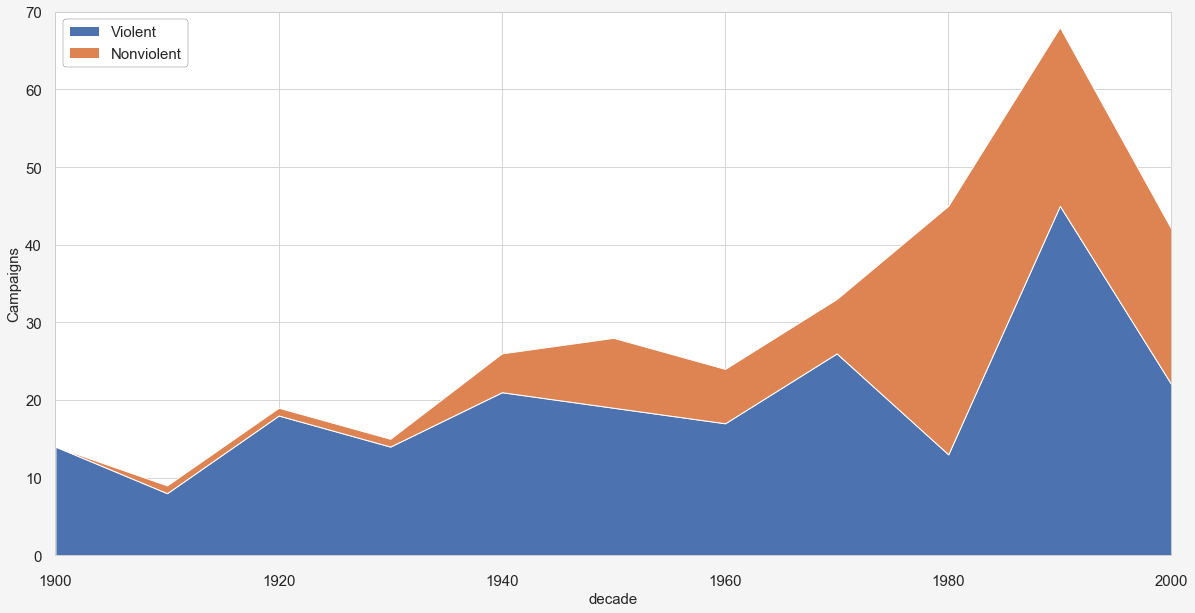

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#custom colors
my_deep_cols=["#4C72B0", "#DD8452"]

# Plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

#setting the limits for axis
plt.xlim(df_decade.decade.min(), df_decade.decade.max()) #1900,2000
plt.ylim(0, 70)

#setting axis titles
plt.ylabel('Campaigns', fontsize = 15)
plt.xlabel('decade', fontsize = 15)

#stackplot
plt.stackplot(df_decade.decade, df_decade.viol, df_decade.nonviol
              ,colors = my_deep_cols
             ,labels=['Violent','Nonviolent'])

#correcting legend position and style
legend =plt.legend(loc='upper left' ,fontsize = 15, edgecolor = 'black' ,frameon=True)
legend.get_frame().set_linewidth(0.3)

#increasing margins between axis ticks, to avoid collisions
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=10)

#increasing fontsize for axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.patch.set_facecolor('whitesmoke')
plt.show()

* We can see clearly that the number of __violent__ campaigns is almost the same until 1980's where it dropped drastically and then peaked at 1990's.
* On the other hand, __non-violent__ campaigns where always fewer than __violent__ ones until 1980's where they surpassed them.
* It seems that something changed in the decade 1980-1990, in the way that people protested. Investigating we found that a lot of [peace protests](https://www.sheffield.ac.uk/news/nr/peace-protests-europe-1980s-1970s-history-anti-nuclear-us-russia-1.816414) were held at this particular period, with anti-war and anti-nuclear requests most of the time. Overall, there was a general decline in violence in protesting by both the law enforcement and the protesting people. "*Most domestic protests are small and relatively tame, the demonstrators older and more sophisticated than the angry students who preceded them on the streets: white-coated doctors against nuclear war, suited government officials against apartheid, cross-bearing clergy against U.S. policy in Central America."*(https://www.latimes.com/archives/la-xpm-1987-07-26-mn-1271-story.html)

### 2: Number of Nonviolent Campaigns and Percentage of Success
In this part we will create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success.
* First we will create a new dataframe `df_decade_nonviol` that contains a subset of dataframe df_decade, only from 1940 onwards and only for non-violent campaigns.
* Then we calculate the success rate as the fraction of successfull campaigns to the overall campaigns count.

In [7]:
#creating a subset dataframe
df_decade_nonviol = df_decade.loc[ (df_decade.decade >=1940) ,['decade','nonviol','success_nonviol']]

#success rate calculation
df_decade_nonviol['success_rate'] = round(df_decade_nonviol['success_nonviol'] / df_decade_nonviol['nonviol'],2)

#setting the index of our new dataframe
df_decade_nonviol = df_decade_nonviol.set_index('decade')

#We drop column success_nonviol cause it has no other use for us
df_decade_nonviol = df_decade_nonviol.drop(['success_nonviol'], axis=1)

df_decade_nonviol

,nonviol,success_rate
decade,,
1940,5,0.40
1950,9,0.33
1960,7,0.43
1970,7,0.57
1980,32,0.53
1990,23,0.52
2000,20,0.70


* Our bar plot has two vertical axes, one for each of the metrics. The left vertical axis corresponds to the number of non-violent campaigns, while the right vertical axis corresponds to the percentage of successes for those campaigns.

* We are using a `pandas` barplot, specifying the secondary axis to be the `success_rate`.

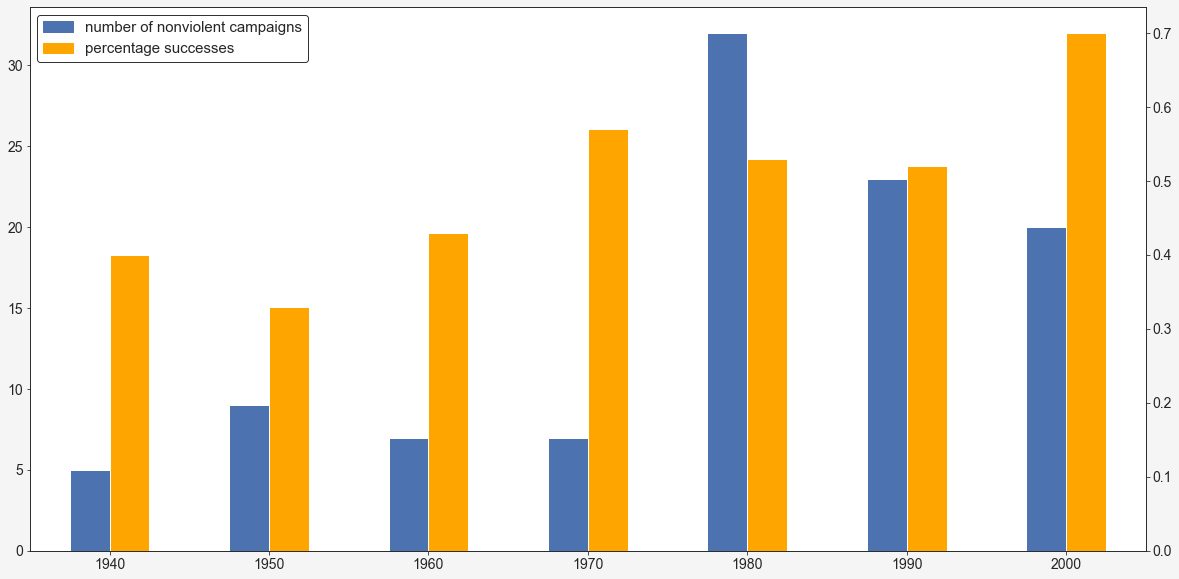

In [9]:
sns.set_style("ticks")
my_deep_cols2=["#4C72B0", "orange"]

import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

#pandas barplot
df_decade_nonviol.plot(kind= 'bar' , secondary_y= 'success_rate' 
                  ,rot= 0 
                  ,legend=False
                  ,color = my_deep_cols2
                  ,ax = ax
                 )

#correcting the legend style and position.
L = [mpatches.Patch(color=c, label= c) 
     for col,c in zip(df_decade_nonviol.columns, my_deep_cols2 )]

ax.legend(handles=L, loc='upper left' ,fontsize = 15, edgecolor = 'black' ,frameon=True
          , labels=['number of nonviolent campaigns','percentage successes'])

ax.set_xlabel('')

fig.patch.set_facecolor('whitesmoke')

plt.show()

* The percentage of successes reached its minimum in the 1950's whereas it peaked in the 2000's. Interestingly, in 1950's began the [civil rights movement](https://en.wikipedia.org/wiki/Civil_rights_movement) (also known as the American civil rights movement) in the United States where it was a decades-long struggle by African Americans to end legalized racial discrimination, disenfranchisement and racial segregation in the United States  and nonviolent resistance campaigns eventually secured new protections in federal law for the human rights of all Americans.
* The most non-violent campaigns were held in the 1980's as we expected by the previous figure. 

### 3: Success Rate by Decade
In this part we will create a plot showing the success rate for violent and nonviolent campaigns by decade.

* Firstly, we create a new dataframe with a subset only from 1940 onwards
* Then we create two new columns, `sr_nonviol` and `sr_viol` that correspond to the calculated success rates for each decade.

In [10]:
# dataframe creation
df_decade_sr = df_decade.loc[ (df_decade.decade >=1940) ,['decade','nonviol','success_nonviol','viol','success_viol']]

# calculating the success rates
df_decade_sr['sr_nonviol'] = round(df_decade_sr['success_nonviol'] / df_decade_sr['nonviol'],2)
df_decade_sr['sr_viol'] = round(df_decade_sr['success_viol'] / df_decade_sr['viol'],2)

# drop any non-usefull columns
df_decade_sr = df_decade_sr.drop(['nonviol','success_nonviol','viol','success_viol'], axis=1)

# Setting the index
df_decade_sr = df_decade_sr.set_index('decade')
df_decade_sr

,sr_nonviol,sr_viol
decade,,
1940,0.40,0.33
1950,0.33,0.37
1960,0.43,0.24
1970,0.57,0.38
1980,0.53,0.38
1990,0.52,0.27
2000,0.70,0.14


* The vertical axis of our barplot corresponds to the success rate.
* We are using a `pandas` side by side barplot.

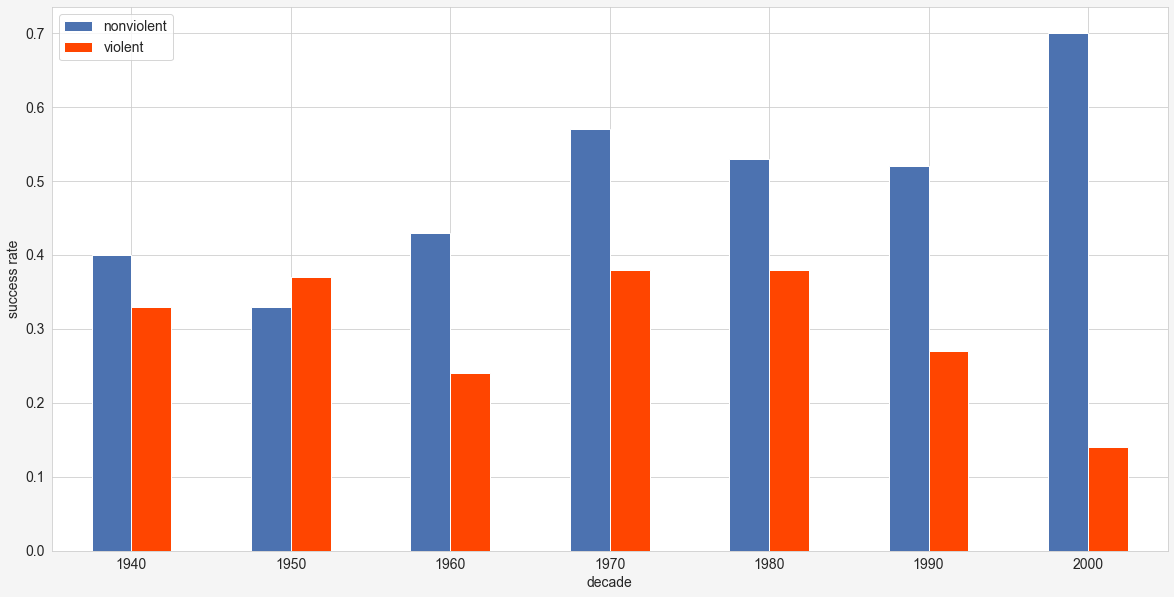

In [12]:
sns.set_style("whitegrid")

#setting custom colors
my_deep_cols = ["#4C72B0", "orangered"]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

#pandas barplot
df_decade_sr.plot(kind= 'bar' 
                  ,rot= 0 
                  ,color = my_deep_cols
                  ,ax = ax
                 )
ax.set_ylabel('success rate')
ax.set_xlabel('decade')
ax.legend(['nonviolent', 'violent']);

fig.patch.set_facecolor('whitesmoke')

* We can see clearly that with the exception of 1950's generally non-violent campaigns are more successfull than their violent counterparts. This difference is more visible as the we move forwards in time, where it skyrocketed in the 2000's.

### 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

We will create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership).

* We are using `pandas.DataFrame.nlargest` that returns the first n rows ordered by column `peakmembership` in descending order.

* We spot an error at the campaign __People Power__ in the Philippines. The variable `eyear` contains a value (1983) that is prior to the variable `byear` (1986), but by definition that is impossible. Searching for further information in __Wikipedia__ for [this particular campaign](https://en.wikipedia.org/wiki/People_Power_Revolution) we find that the campaign was caused by the assasination of __Benigno Aquino Jr__ in 1983 and reached its peak at 1986. Thus, we correct these values accordingly.

In [14]:
df_t25 = df[['campaign','peakmembership','lmembers','location'
      ,'byear','eyear','lduration','target'
      ,'viol','success']].nlargest(25,'peakmembership').reset_index(drop=True)

#data error correction: Philippines, People Power: 1983-1986
df_t25.loc[df_t25.index == 2,'byear'] = 1983
df_t25.loc[df_t25.index == 2,'eyear'] = 1986

#change datatype to int
df_t25.astype({'peakmembership': 'int64'}).dtypes

#creating column with the ordering
df_t25['id'] = np.arange(1,len(df_t25)+1)

df_t25 = df_t25.rename(columns={"byear": "start_year", "eyear": "end_year","viol": "violent"})
           
#styling pandas dataframe for better visual output
df_t25[['id','campaign','peakmembership','location'
      ,'start_year','end_year','target'
      ,'violent','success']].style.format({"peakmembership": "{:20,.0f}"})\
                         .hide_index()\
                        .background_gradient(cmap='Blues',subset='id')\
                        .bar(subset=["peakmembership"], color='#FFA07A')\
                        .set_caption('25 Largest Resistance Campaigns')

id,campaign,peakmembership,location,start_year,end_year,target,violent,success
1,Chinese rebels,"4,500,000",China,1937,1945,Japanese occupation,1,0
2,Iranian Revolution,"2,000,000",Iran,1977,1979,Shah Reza Pahlavi,0,1
3,People Power,"2,000,000",Philippines,1983,1986,Ferdinand Marcos,0,1
4,,"1,000,000",Mexico,2006,2006,Calderon regime,0,0
5,diretas ja,"1,000,000",Brazil,1984,1985,Military rule,0,1
6,,"1,000,000",Nigeria,1993,1999,Military rule,0,1
7,Cedar Revolution,"1,000,000",Lebanon,2005,2005,Syrian forces,0,1
8,Chinese communist movement,"1,000,000",China,1922,1949,Kuomintang regime,1,1
9,Red Guard,"1,000,000",China,1967,1968,anti-Maoists,1,0
10,,"1,000,000",China,1989,1989,Communist regime,0,0


* Interestingly, there is a campaign in __Greece__ against the *Karamanlis regime* at 1963 in the results. It was the year that [Grigoris Lampbakis](https://en.wikipedia.org/wiki/Grigoris_Lambrakis) was assasinated by right-wing zealots which provoked mass protests and led to a political crisis. This result is remarkable because if we consider the population of Greece in comparison to the other countries populations in this list like China.

### 5. The Effect of Participation on the Probability of Campaign Success

We now examine the effect of participation on the probability of campaign success. We run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends.

In [15]:
df_pt = df[['success','mempc' ,'lnpop']].dropna()
df_pt = df_pt.astype({'success': 'float32'})

In [16]:
from statsmodels.formula.api import logit

#creating the logistic regression model using R-style formula
logit_mod = logit("success ~ mempc + lnpop", df_pt)

#fitting the model
logit_fit = logit_mod.fit()

logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                  0.1294
Time:                        14:06:26   Log-Likelihood:                -96.951
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 5.551e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8199      1.921     -3.030      0.002      -9.584      -2.055
mempc          4.4892      0.986      4.554      0.000       2.557       6.421
lnpop          0.0907      0.129      0.706      0.480      -0.161       0.343
==============================================================================
"""

Running the logistic regression for the dependent variable `success` using the independent variable `mempc` (membership per capita) and controlling for `lnpop` gives us the following results:
* $\text{McFadden's pseudo }R^2: 0.1294$, which is defined as $R^2_{\text{McFadden}} = 1 - \frac{\log(L_c)}{\log(L_{\text{null}})}$ where $L_c$  is the (maximized) likelihood value from the current fitted model, and $L_{\text{null}}$ denotes the corresponding value but for the null model - the model with only an intercept and no covariates. If the covariates in our current model give no predictive information about the outcome then this metric will be close to zero. On the other hand, if our current model explains virtually all of the variation in the outcome then this metric will be close to 1. Of course in most empirical research typically one could not hope to find predictors which are strong enough to give predicted probabilities so close to 0 or 1. In our case, our model explains some of the variability of the response data.

* Generally, __p-value__ expresses the probability of observing the test statistic assuming the null hypothesis that the coefficient is zero ($H_0 \beta_{mempc}  = 0$). In our case, we get a $\textbf{p-value} \approx	0.000$ which indicates that `mempc` is statistically significant in the prediction of `success` controlling for `lnpop`.
* Moreover, we get a __standard error__ of $0.986$ for the coefficient of `mempc` and $z = \frac{\text{coeff}}{\text{std_err}} =  4.554$

* For the interpretation of the coefficients, this fitted model states that holding `lnpop` at a fixed value,  the expected change in log odds of success for a one-unit increase in the `mempc` variable is 4.4892 .<br/> Similarly, holding `mempc` at a fixed value, the expected change in logg odds of success for a one-unit increase in `lnpop` is 0.0907. So we will see a $exp(0.0907) \approx 1.1%$ increase in the odds of a successfull campaign for a one-unit increase in `lnpop`. But a one-unit increase in the logged location’s population the year the campaign ends is a 2.71 increase in the location's population. So for every 2710 people we expect a change of 1.1% in the odds of a successfull campaign.

Now that we have our fitted model, we make predictions for the probability of success using the dataframe with the variables `mempc` and `lnpop`. 

In [17]:
predictions = logit_fit.predict(df_pt)

Having done that, we create a scatter plot showing the logged participants per capita (`mempc`), on the $x$ axis, and the probability of success, on the $y$ axis:

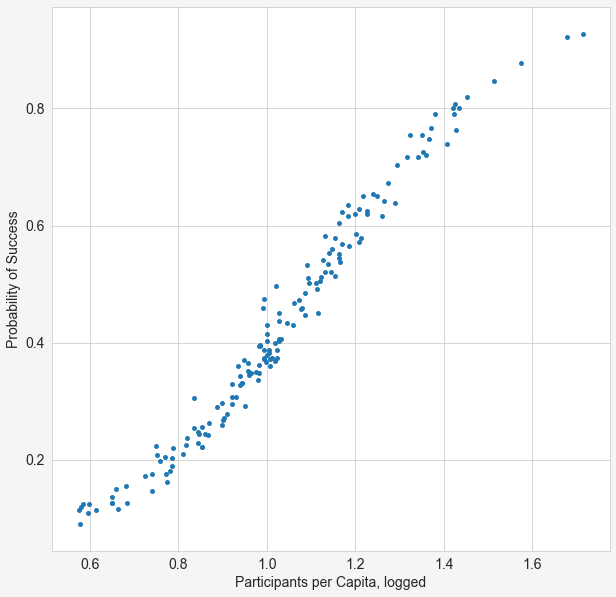

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(df_pt.mempc , predictions, s=15)

ax.set_ylabel('Probability of Success')
ax.set_xlabel('Participants per Capita, logged')

fig.patch.set_facecolor('whitesmoke')

As expected, the probability of success increases when more people join the campaigns.

### 6. The Level of Participation Tipping Point

Now we will find the percentage of the population that is the tipping point for success in a campaign using the previous model with two independent variables `mempc` and `lnpop`.

* From the definition of logistic regression, the probability of success in our model is defined as 
$P(\textit{success}_i)  = sigmoid(\beta_0 + \beta_1  \textbf{mempc}_i + \beta_2 \textbf{lnpop}_i)$, where $sigmoid(z) = \frac{1}{1 + e^{-z}}$.
* For every value of `mempc` and `lnpop`, we make a prediction using the coefficients $\beta_0, \beta_1 , \beta_2$ that we got from our fitted model, and the output, because of the sigmoid function, is a number $ \in [0,1]$ which represents the probability of the positive outcome - in our case a successfull campaign.

* We have the predicted probabilities for success for every observation. But if we have to classify an observation to either 0 or 1 then 0.5 will be the optimal threshold to make that classification. For every observation that we get $P(\textit{success}_i) > 0.5 $, we predict it to be a successfull campaign. Thus, the level of participation tipping point is the value above which we predict the campaign to be successfull and corresponds to $P(\textit{success}_i) = 0.5 $.

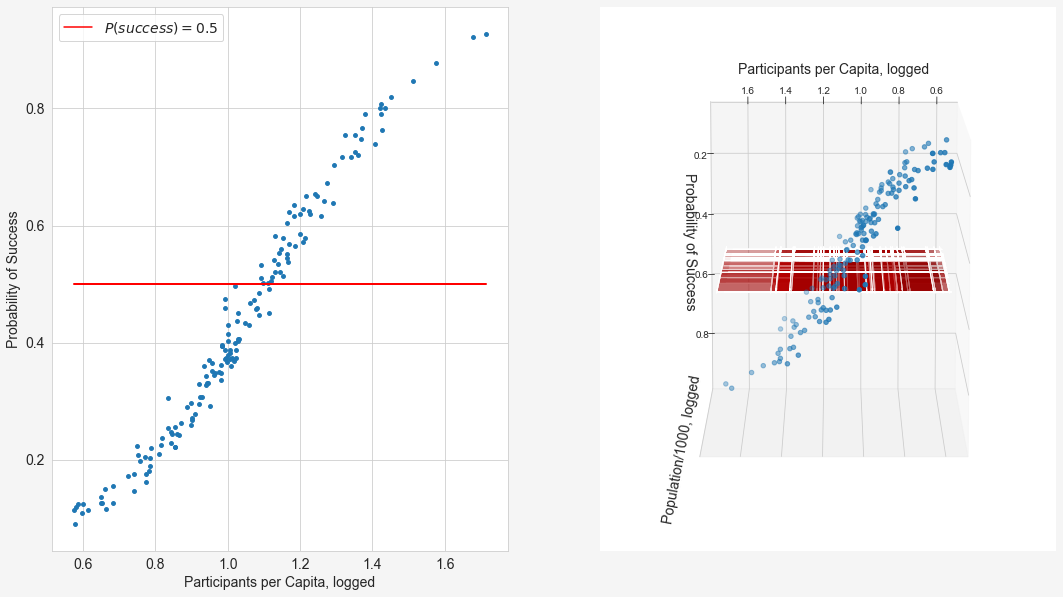

In [19]:
from mpl_toolkits.mplot3d import Axes3D

#sigmoid function
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

#def inv_sigmoid(s):
#  return np.log(s/(1-s))

#predictions using the analytic formula
predictions_an = sigmoid(logit_fit.params[0] + logit_fit.params[1]*df_pt.mempc + logit_fit.params[2]*df_pt.lnpop)

fig = plt.figure(figsize=(18,10))

#first subplot: 2D
ax = fig.add_subplot(1,2,1)
ax.scatter(df_pt.mempc,predictions_an, s=15)

ax.set_ylabel('Probability of Success')
ax.set_xlabel('Participants per Capita, logged')

# horizontal line
horiz_line_data = np.array([0.5 for i in range(0,len(df_pt.mempc))])
ax.plot(df_pt.mempc, horiz_line_data, 'r-') 
ax.legend(['$P(success) = 0.5$'])

#second subplot: 3D
ax = fig.add_subplot(1,2,2, projection='3d')

y = np.array([0.5 for i in range(0,len(df_pt.mempc))])

X,Y = np.meshgrid(df_pt.mempc,y)
Z = np.zeros(shape=(163,163))

#ax.grid(False)
for i in range(163):
    for j in range(163):
        Z[j][i] = df_pt.lnpop.iloc[j]
        
ax.scatter(df_pt.mempc,predictions_an,df_pt.lnpop)
ax.set_xlabel('Participants per Capita, logged')
ax.set_ylabel('Probability of Success')
ax.set_zlabel('Population/1000, logged')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.view_init(elev=100., azim=90)
ax.set_zticks([])


ax.plot_surface(X, Y, Z,alpha = 0.1,color= 'red')
fig.patch.set_facecolor('whitesmoke')

We know that the $\text{sigmoid}(z) =  0.5$ when $z = \log(\frac{0.5}{1-0.5}) =  0, \quad \Rightarrow \beta_0 + \beta_1  \textbf{mempc}_i + \beta_2 \textbf{lnpop} = 0$. Thus, solving for our unknown parameter we get that, $\text{mempc}_{t} = - \frac{\beta_0}{\beta_1}  - \frac{\beta_2 lnpop}{\beta_1}$. Now we must make some calculations in order to find the population percentage that corresponds to the tipping point:
$$
\begin{align*}
\textit{We know that}, \quad
\text{population} = 1000 e^{\text{lnpop}} ,\quad
\text{lmembers} = \log(\text{peakmembership}) ,\quad
\text{mempc} = \frac{\text{lmembers}}{\text{lnpop}} = \frac{\log(\text{peakmembership})}{\log(\text{population}/1000)  }
\end{align*}
$$

$$
\begin{align*}
\frac{lmembers}{lnpop }
 &= - \frac{\beta_0}{\beta_1}  - \frac{\beta_2  }{\beta_1}lnpop
 \Rightarrow
 \log(\text{peakmembership}) = - \frac{\beta_0}{\beta_1}lnpop  - \frac{\beta_2 }{\beta_1}(lnpop)^2
 \\
\Rightarrow &
peakmembership = exp \{ - \frac{\beta_0}{\beta_1}lnpop  - \frac{\beta_2 }{\beta_1}(lnpop)^2 \}
\Rightarrow \frac{peakmembership}{population} = \frac{e^{- \frac{\beta_0}{\beta_1}lnpop  - \frac{\beta_2 }{\beta_1}(lnpop)^2}}{1000 e^{\text{lnpop}}} = \frac{1}{1000} e^{ -lnpop -\frac{\beta_0}{\beta_1}lnpop  - \frac{\beta_2 }{\beta_1}(lnpop)^2} \\[10pt]
\Rightarrow & \textit{Population Percentage tipping point %} = \frac{1}{10} exp\big\{ -lnpop -\frac{\beta_0}{\beta_1}lnpop  - \frac{\beta_2 }{\beta_1}(lnpop)^2 \big\} \%
\end{align*}
$$
We can visualize the tipping points for each `lnpop` datapoint as follows:

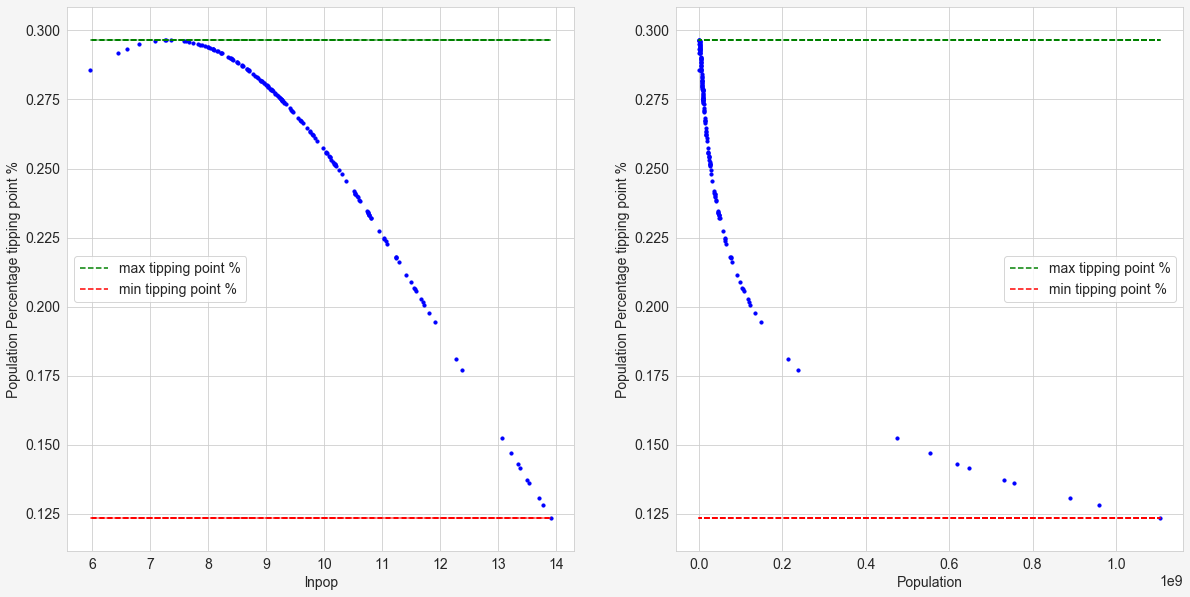

In [20]:
b0 = logit_fit.params[0]
b1 = logit_fit.params[1]
b2 = logit_fit.params[2]

tipping_points = np.exp(- df_pt.lnpop - (b0/b1)*df_pt.lnpop - (b2/b1)*np.square(df_pt.lnpop) ) /10
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.scatter(df_pt.lnpop,tipping_points, s=10,c = 'b')

ax.set_ylabel('Population Percentage tipping point %')
ax.set_xlabel('lnpop')

# vertical line
t_upper = np.array([tipping_points.max() for i in range(0,len(df_pt.lnpop))])
t_lower = np.array([tipping_points.min() for i in range(0,len(df_pt.lnpop))])

ax.plot(df_pt.lnpop, t_upper, 'g--') 
ax.plot(df_pt.lnpop, t_lower, 'r--') 
ax.legend(['max tipping point %','min tipping point %'],loc='best')

ax = fig.add_subplot(1,2,2)
ax.scatter(1000*np.exp(df_pt.lnpop),tipping_points, s=10,c = 'b')

ax.set_ylabel('Population Percentage tipping point %')
ax.set_xlabel('Population')
ax.plot(1000*np.exp(df_pt.lnpop), t_upper, 'g--') 
ax.plot(1000*np.exp(df_pt.lnpop), t_lower, 'r--') 
ax.legend(['max tipping point %','min tipping point %'],loc='best')

fig.patch.set_facecolor('whitesmoke')

In conclusion, we estimate that  the percentage of the population that is the tipping point for success in a campaign is:

In [21]:
print('Population Percentage tipping point: (%.2f %% , %.2f %%):' % (tipping_points.min(),tipping_points.max())
      ,'with a mean value: %.2f %%' % tipping_points.mean())

Population Percentage tipping point: (0.12 % , 0.30 %): with a mean value: 0.26 %


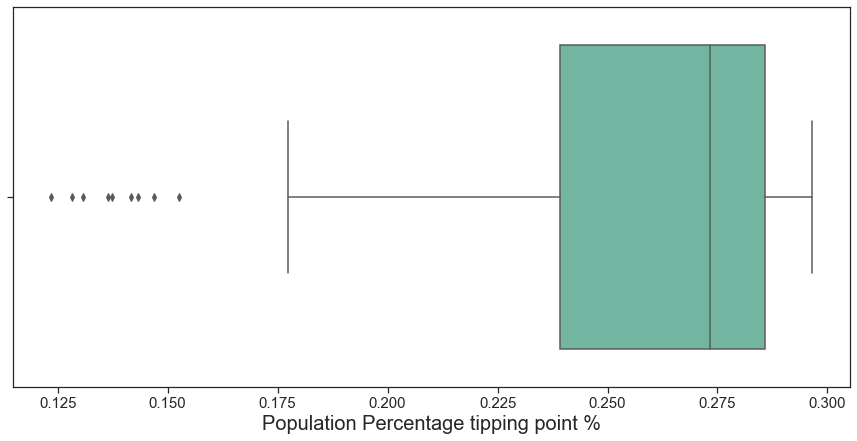

In [22]:
#Tipping points Boxplot

sns.set(style="ticks")
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(x=tipping_points, palette="Set2")
ax.set_xlabel("Population Percentage tipping point %",fontsize=20)
ax.tick_params(labelsize=15)

### 7. Nonviolent Resistance, Target Regime Type, Geographical Location
1. We will examine whether nonviolent resistance remains significant even if we control for the target's regime type. We will run a logistic regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.

In [23]:
df_reg = df[['success','nonviol' ,'tpolity','lmembers','lnpop']].dropna()
df_reg = df_reg.astype({'success': 'float32'
                       ,'nonviol': 'float32'
                       ,'tpolity': 'float32'})

reg_fit = logit("success ~ nonviol + lmembers + lnpop+ tpolity", df_reg).fit()

reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  141
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                  0.1627
Time:                        14:11:55   Log-Likelihood:                -79.967
converged:                       True   LL-Null:                       -95.506
Covariance Type:            nonrobust   LLR p-value:                 2.953e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1085      1.413     -0.077      0.939      -2.878       2.661
nonviol        0.9048      0.464      1.952      0.051      -0.004       1.813
lmembers       0.3751      0.128      2.926      0.003       0.124       0.626
lnpop         -0.4363      0.142     -3.067      0.002      -0.715      -0.157
tpolity        0.0520      0.030      1.744      0.081      -0.006       0.110
==============================================================================
"""

We get a $\text{p-value} \approx 0.051$, so we have a strong tendency towards statistical significance for the `nonviol` variable, even if we control for `tpolity`,`lmembers`,`lnpop`. Overall, removing the effects of the population and population percentage from the equation, when we included them in our regression model as control variables, did not alter the significance of the non-violence indicator to the prediction of the campaign outcome.

2. Finally we will examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

In [24]:
df_loc = df[['success','nonviol' ,'viol','lmembers','lnpop'
                       ,'middleeast','americas','asia','europe','africa','fsu']].dropna()
df_loc = df_loc.astype({'success': 'float32'
                                          ,'nonviol': 'float32'
                                          ,'middleeast': 'float32'
                                          ,'americas': 'float32'
                                          ,'asia': 'float32'
                                          ,'europe': 'float32'
                                          ,'africa': 'float32'})

loc_fit = logit("success ~ nonviol+ lmembers + lnpop\
                     + middleeast + americas + asia + europe + africa", df_loc).fit()

loc_fit.summary()


Optimization terminated successfully.
         Current function value: 0.554899
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                  0.1877
Time:                        14:15:08   Log-Likelihood:                -90.448
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 1.468e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4396      1.597     -0.902      0.367      -4.569       1.690
nonviol        0.3028      0.470      0.645      0.519      -0.618       1.223
lmembers       0.5052      0.131      3.862      0.000       0.249       0.762
lnpop         -0.4425      0.157     -2.810      0.005      -0.751      -0.134
middleeast    -1.4617      0.945     -1.546      0.122      -3.314       0.391
americas       0.7736      0.796      0.972      0.331      -0.787       2.334
asia           0.2853      0.756      0.377      0.706      -1.197       1.767
europe         0.6884      0.835      0.824      0.410      -0.948       2.325
africa         0.4931      0.692      0.713      0.476      -0.863       1.849
==============================================================================
"""

We get a $\text{p-value} \approx 0.519$, so `nonviol` does not remain significant when we control for geographical location of the compaign. So probably, the effects of the location of the campaign play a major role in the significance of the non-violence indicator in our model. We will try to find the reason behind that, as follows:

In [25]:
# Function that corresponds dummy varibles to a categorical variable with the location
def location_conv(row):
    if row['middleeast'] == 1:
        return 'middleeast'
    elif row['americas'] == 1:
        return 'americas' 
    elif row['asia'] == 1:
        return 'asia' 
    elif row['europe'] == 1:
        return 'europe' 
    elif row['africa'] == 1:
        return 'africa' 
    elif row['fsu'] == 1:
        return 'fsu' 
    
# Create column location
df_loc['location'] = df_loc.apply(location_conv, axis = 1)

df_loc['success_nonviol'] = np.where((df_loc.success == 1) & (df_loc.nonviol == 1),1,0)
df_loc['success_viol'] = np.where((df_loc.success == 1) & (df_loc.viol == 1),1,0)

#creating a dataframe with the aggregated results
df_loc_grouped = df_loc.groupby(['location']).sum().astype(int)[['nonviol','viol','success','success_nonviol','success_viol']]

df_loc_grouped['sr_nonviol'] = round(df_loc_grouped['success_nonviol'] / df_loc_grouped['nonviol'],2)
df_loc_grouped['sr_viol'] = round(df_loc_grouped['success_viol'] / df_loc_grouped['viol'],2)

df_loc_grouped = df_loc_grouped.drop(['success','success_nonviol','success_viol'], axis=1)
df_loc_grouped

,nonviol,viol,sr_nonviol,sr_viol
location,,,,
africa,11,44,0.55,0.41
americas,10,11,0.90,0.18
asia,15,25,0.33,0.36
europe,13,3,0.62,0.67
fsu,9,5,0.89,0.00
middleeast,4,13,0.50,0.08


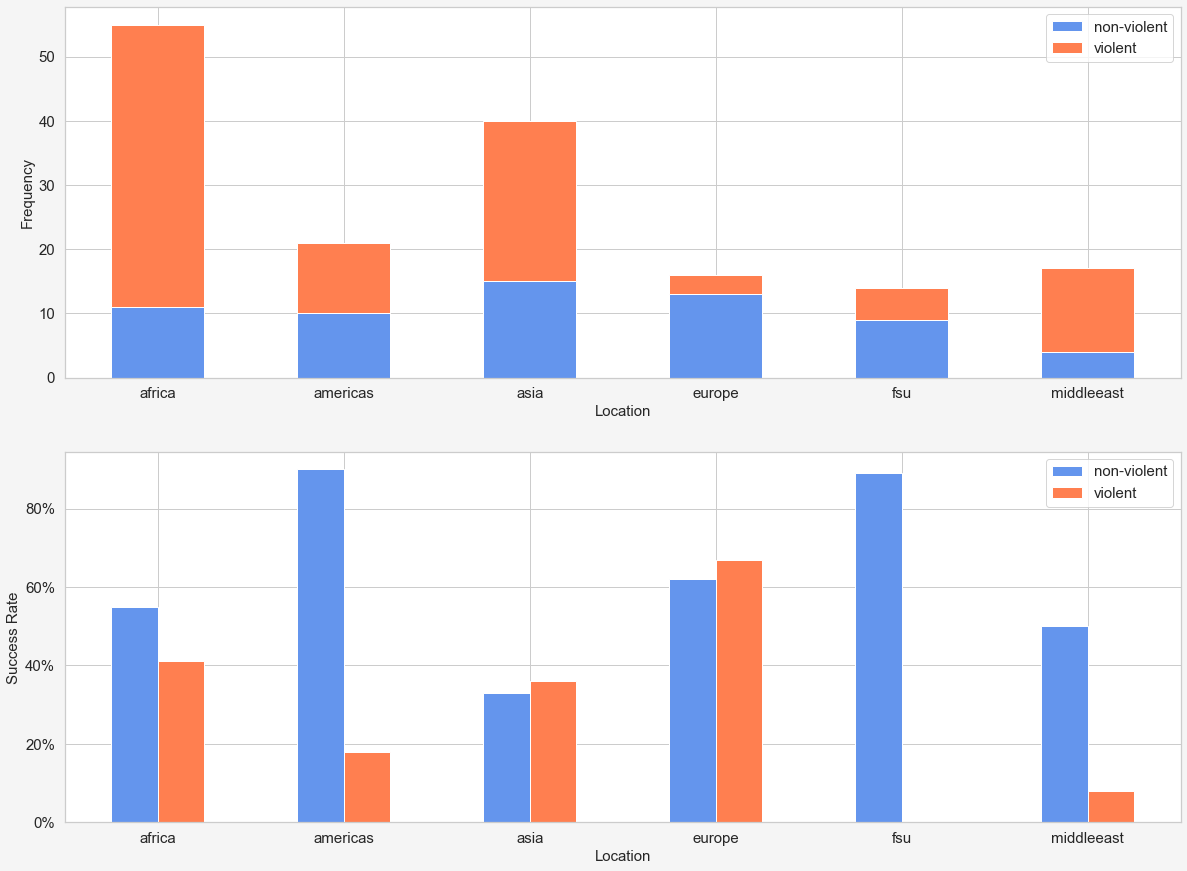

In [28]:

sns.set_style("whitegrid")

#setting custom colors
my_deep_cols = ["cornflowerblue", "coral"]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(2, 1, 1)

#pandas barplot
ax = df_loc_grouped[['nonviol','viol']].plot(kind= 'bar' 
                  ,rot= 0 
                  ,color = my_deep_cols
                  ,ax = ax
                  ,stacked = 'True'
                 )
ax.set_ylabel('Frequency',fontsize =15)
ax.set_xlabel('Location',fontsize =15)
ax.tick_params(labelsize=15)
ax.legend(['non-violent', 'violent'], fontsize = 15,loc ='best')

ax = fig.add_subplot(2, 1, 2)
ax = df_loc_grouped[['sr_nonviol','sr_viol']].plot(kind= 'bar' 
                  ,rot= 0 
                  ,color = my_deep_cols
                  ,ax = ax
                 )
ax.set_ylabel('Success Rate',fontsize =15)
ax.set_xlabel('Location',fontsize =15)
ax.tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.legend(['non-violent', 'violent'], fontsize = 15,loc ='best');

fig.patch.set_facecolor('whitesmoke')

We can see that the location of the campaign might actually play an important role for the success of violent and non-violent campaigns.
* In __Africa__ and __Asia__ there were more violent campaigns than non-violent, and the percentage of success is almost the same.
* In __America__ and __Former Soviet Union__ there are almost the same number of violent and non-violent campaigns, but the success rate of non-violent campaigns is huge compared to the violent ones. There were almost none violent campaigns that ended successfully.
* Furthermore, in the __Middle-east__ there were more violent campaigns but their success rate was smaller than non-violent ones.
* in __Europe__, there were more peacefull campaigns, but the success rate is the same between the two categories.